In [5]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
# Create a dataframe df

df = pd.read_csv(r"C:\Users\rsach\OneDrive\Desktop\AI & ML\4. ML 1\bicycle sharing.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.shape

(730, 16)

In [8]:
# Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

C:\Users\rsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


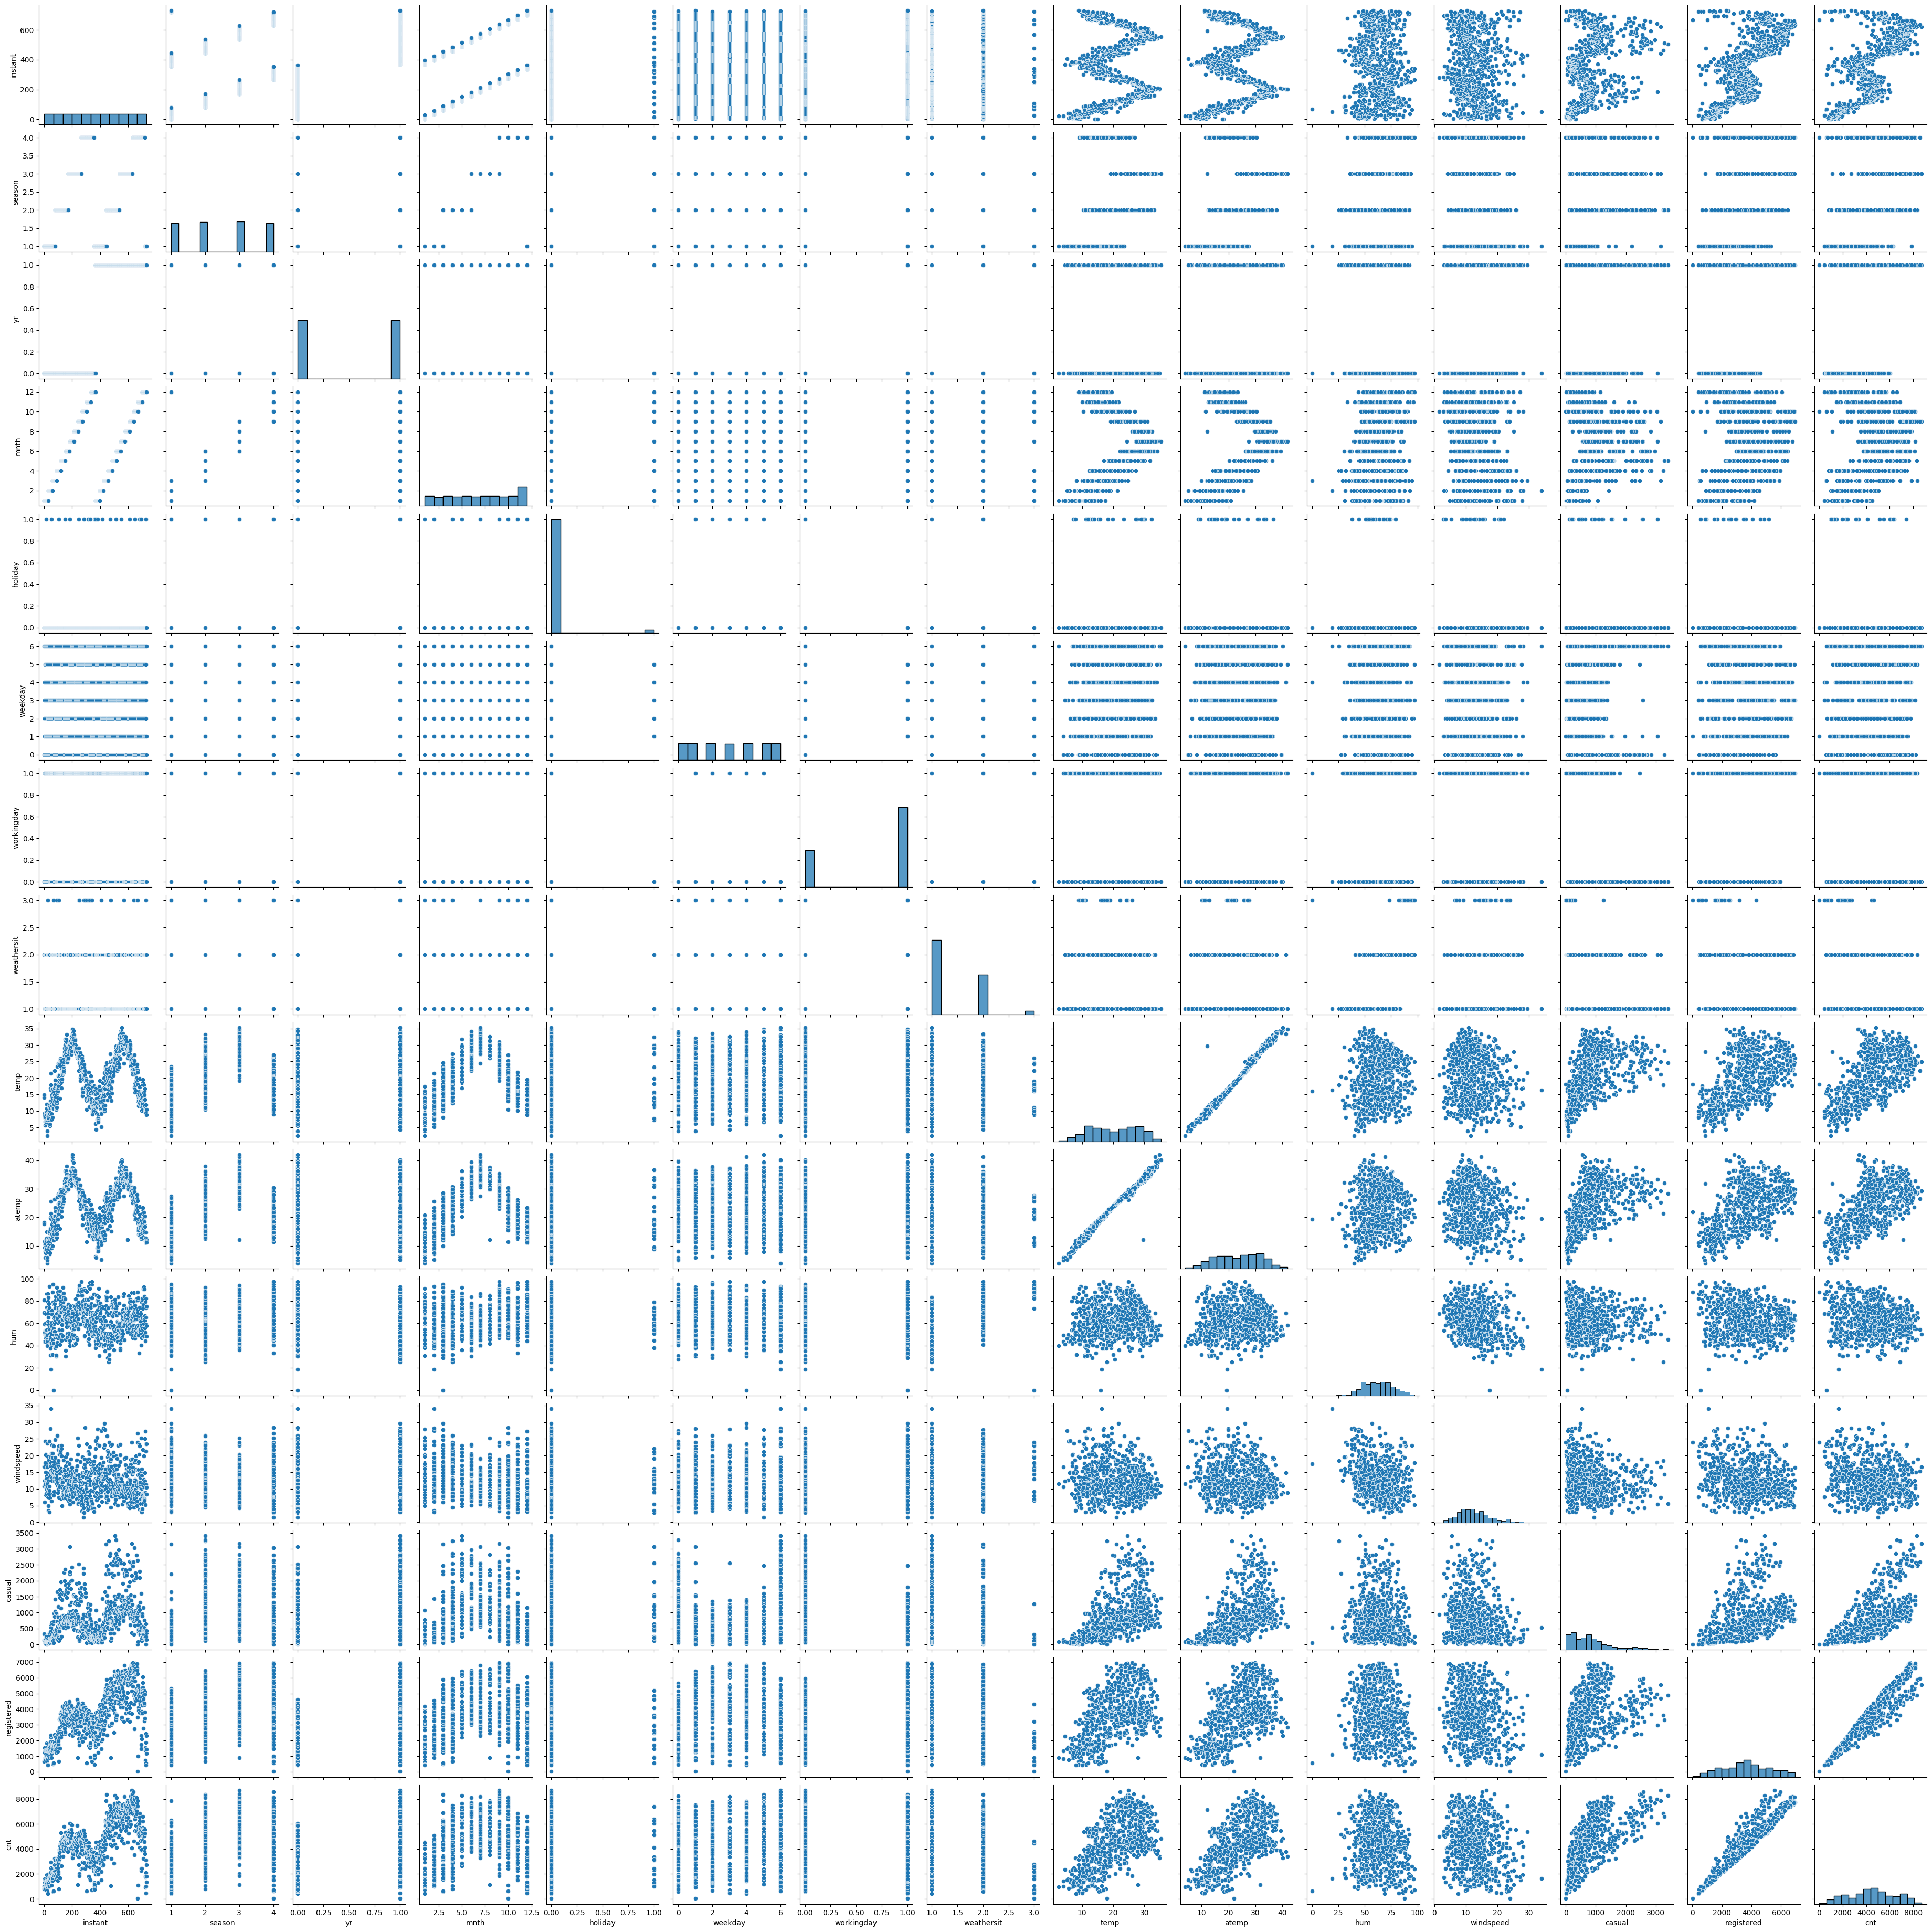

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [13]:
# Defining season as catagorical data

df["season"] = df["season"].map({1:"Spring", 2: "Summer", 3: "Fall", 4: "Winter" })

In [14]:
season_1 = pd.get_dummies(df["season"],dtype=int,drop_first=True)

In [15]:
season_1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
# Concatinate the newly created dummy with the original dataframe
df = pd.concat([df,season_1], axis = 1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [17]:
# Drop season column as dummies are present.
df1 = df.drop("season",axis = 1)

In [18]:
# Check for datatype and values of yr column
df1.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [19]:
# replace 0 and 1 with 2018 and 2019 as mentioned in the dictionary and convert dtype to year.
df1['yr'] = df1['yr'].map({0:"2018", 1: "2019"})
df1.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,1,01-01-2018,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [20]:
#Create dummies for column yr
Year = pd.get_dummies(df1['yr'],dtype=int,drop_first=True)

In [21]:
Year.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [22]:
df2 = pd.concat([df1,Year],axis=1)
df2.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,2019
0,1,01-01-2018,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,2,02-01-2018,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,3,03-01-2018,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,4,04-01-2018,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,5,05-01-2018,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


In [23]:
#  Create dummy variables for month

months = pd.get_dummies(df['mnth'],dtype=int,drop_first=True,prefix='mnth')

In [24]:
months.head()

,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# concat to the main dataframe and drop mnth column

df3 = pd.concat([df2,months],axis =1)
df3.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,01-01-2018,2018,1,0,6,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,2018,1,0,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,2018,1,0,1,1,1,8.050924,9.47025,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,2018,1,0,2,1,1,8.200000,10.60610,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,2018,1,0,3,1,1,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Create dummy variables for column holiday
holiday = pd.get_dummies(df3['holiday'],dtype =int,prefix="holiday",drop_first=True)

In [27]:
holiday.head()

,holiday_1
0,0
1,0
2,0
3,0
4,0


In [28]:
# Concat with main dataframe
df4 = pd.concat([df3,holiday],axis=1)
df4.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1
0,1,01-01-2018,2018,1,0,6,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,2018,1,0,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,2018,1,0,1,1,1,8.050924,9.47025,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,2018,1,0,2,1,1,8.200000,10.60610,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,2018,1,0,3,1,1,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0


In [29]:
 # Create dummies for weekday
weekday = pd.get_dummies(df4['weekday'], prefix='day',dtype=int,drop_first=True)
weekday.head()

,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [30]:
#Concat with the main df4

df5 = pd.concat([df4,weekday],axis =1)
df5.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_10,mnth_11,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6
0,1,01-01-2018,2018,1,0,6,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,2018,1,0,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,2018,1,0,1,1,1,8.050924,9.47025,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,2018,1,0,2,1,1,8.200000,10.60610,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,2018,1,0,3,1,1,9.305237,11.46350,...,0,0,0,0,0,0,1,0,0,0


In [31]:
#Create dummies for weathersit

weather = pd.get_dummies(df5['weathersit'],prefix='Wthr',drop_first=True,dtype=int)
weather.head()

,Wthr_2,Wthr_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [32]:
#concat with df5
df6 = pd.concat([df5,weather],axis=1)

In [33]:
df6.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6,Wthr_2,Wthr_3
0,1,01-01-2018,2018,1,0,6,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,1,1,0
1,2,02-01-2018,2018,1,0,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,2018,1,0,1,1,1,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,2018,1,0,2,1,1,8.200000,10.60610,...,0,0,0,1,0,0,0,0,0,0
4,5,05-01-2018,2018,1,0,3,1,1,9.305237,11.46350,...,0,0,0,0,1,0,0,0,0,0


In [34]:
# drop columns for which dummies were created and are reduntant for modelling.

df7 = df6.drop(['dteday','instant','yr','mnth','holiday','weekday','weathersit','casual','registered'], axis=1)
df7.head()

,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,2019,...,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6,Wthr_2,Wthr_3
0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
#Splitting into train test sets
df_train,df_test = train_test_split(df7,train_size=0.7,random_state=100)
df_train.shape

(510, 30)

In [36]:
# Carry out normalisation for the data with minmax scaler
scaler = MinMaxScaler()


In [37]:
# Create numvars for normalising numerical data only
numvars = ['temp','atemp','hum', 'windspeed','cnt']
df_train[numvars] = scaler.fit_transform(df_train[numvars])
df_train.head()

,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,2019,...,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6,Wthr_2,Wthr_3
576,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
426,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
728,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
111,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
df_train.describe()

,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,2019,...,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6,Wthr_2,Wthr_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,...,0.084314,0.025490,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,...,0.278131,0.157763,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


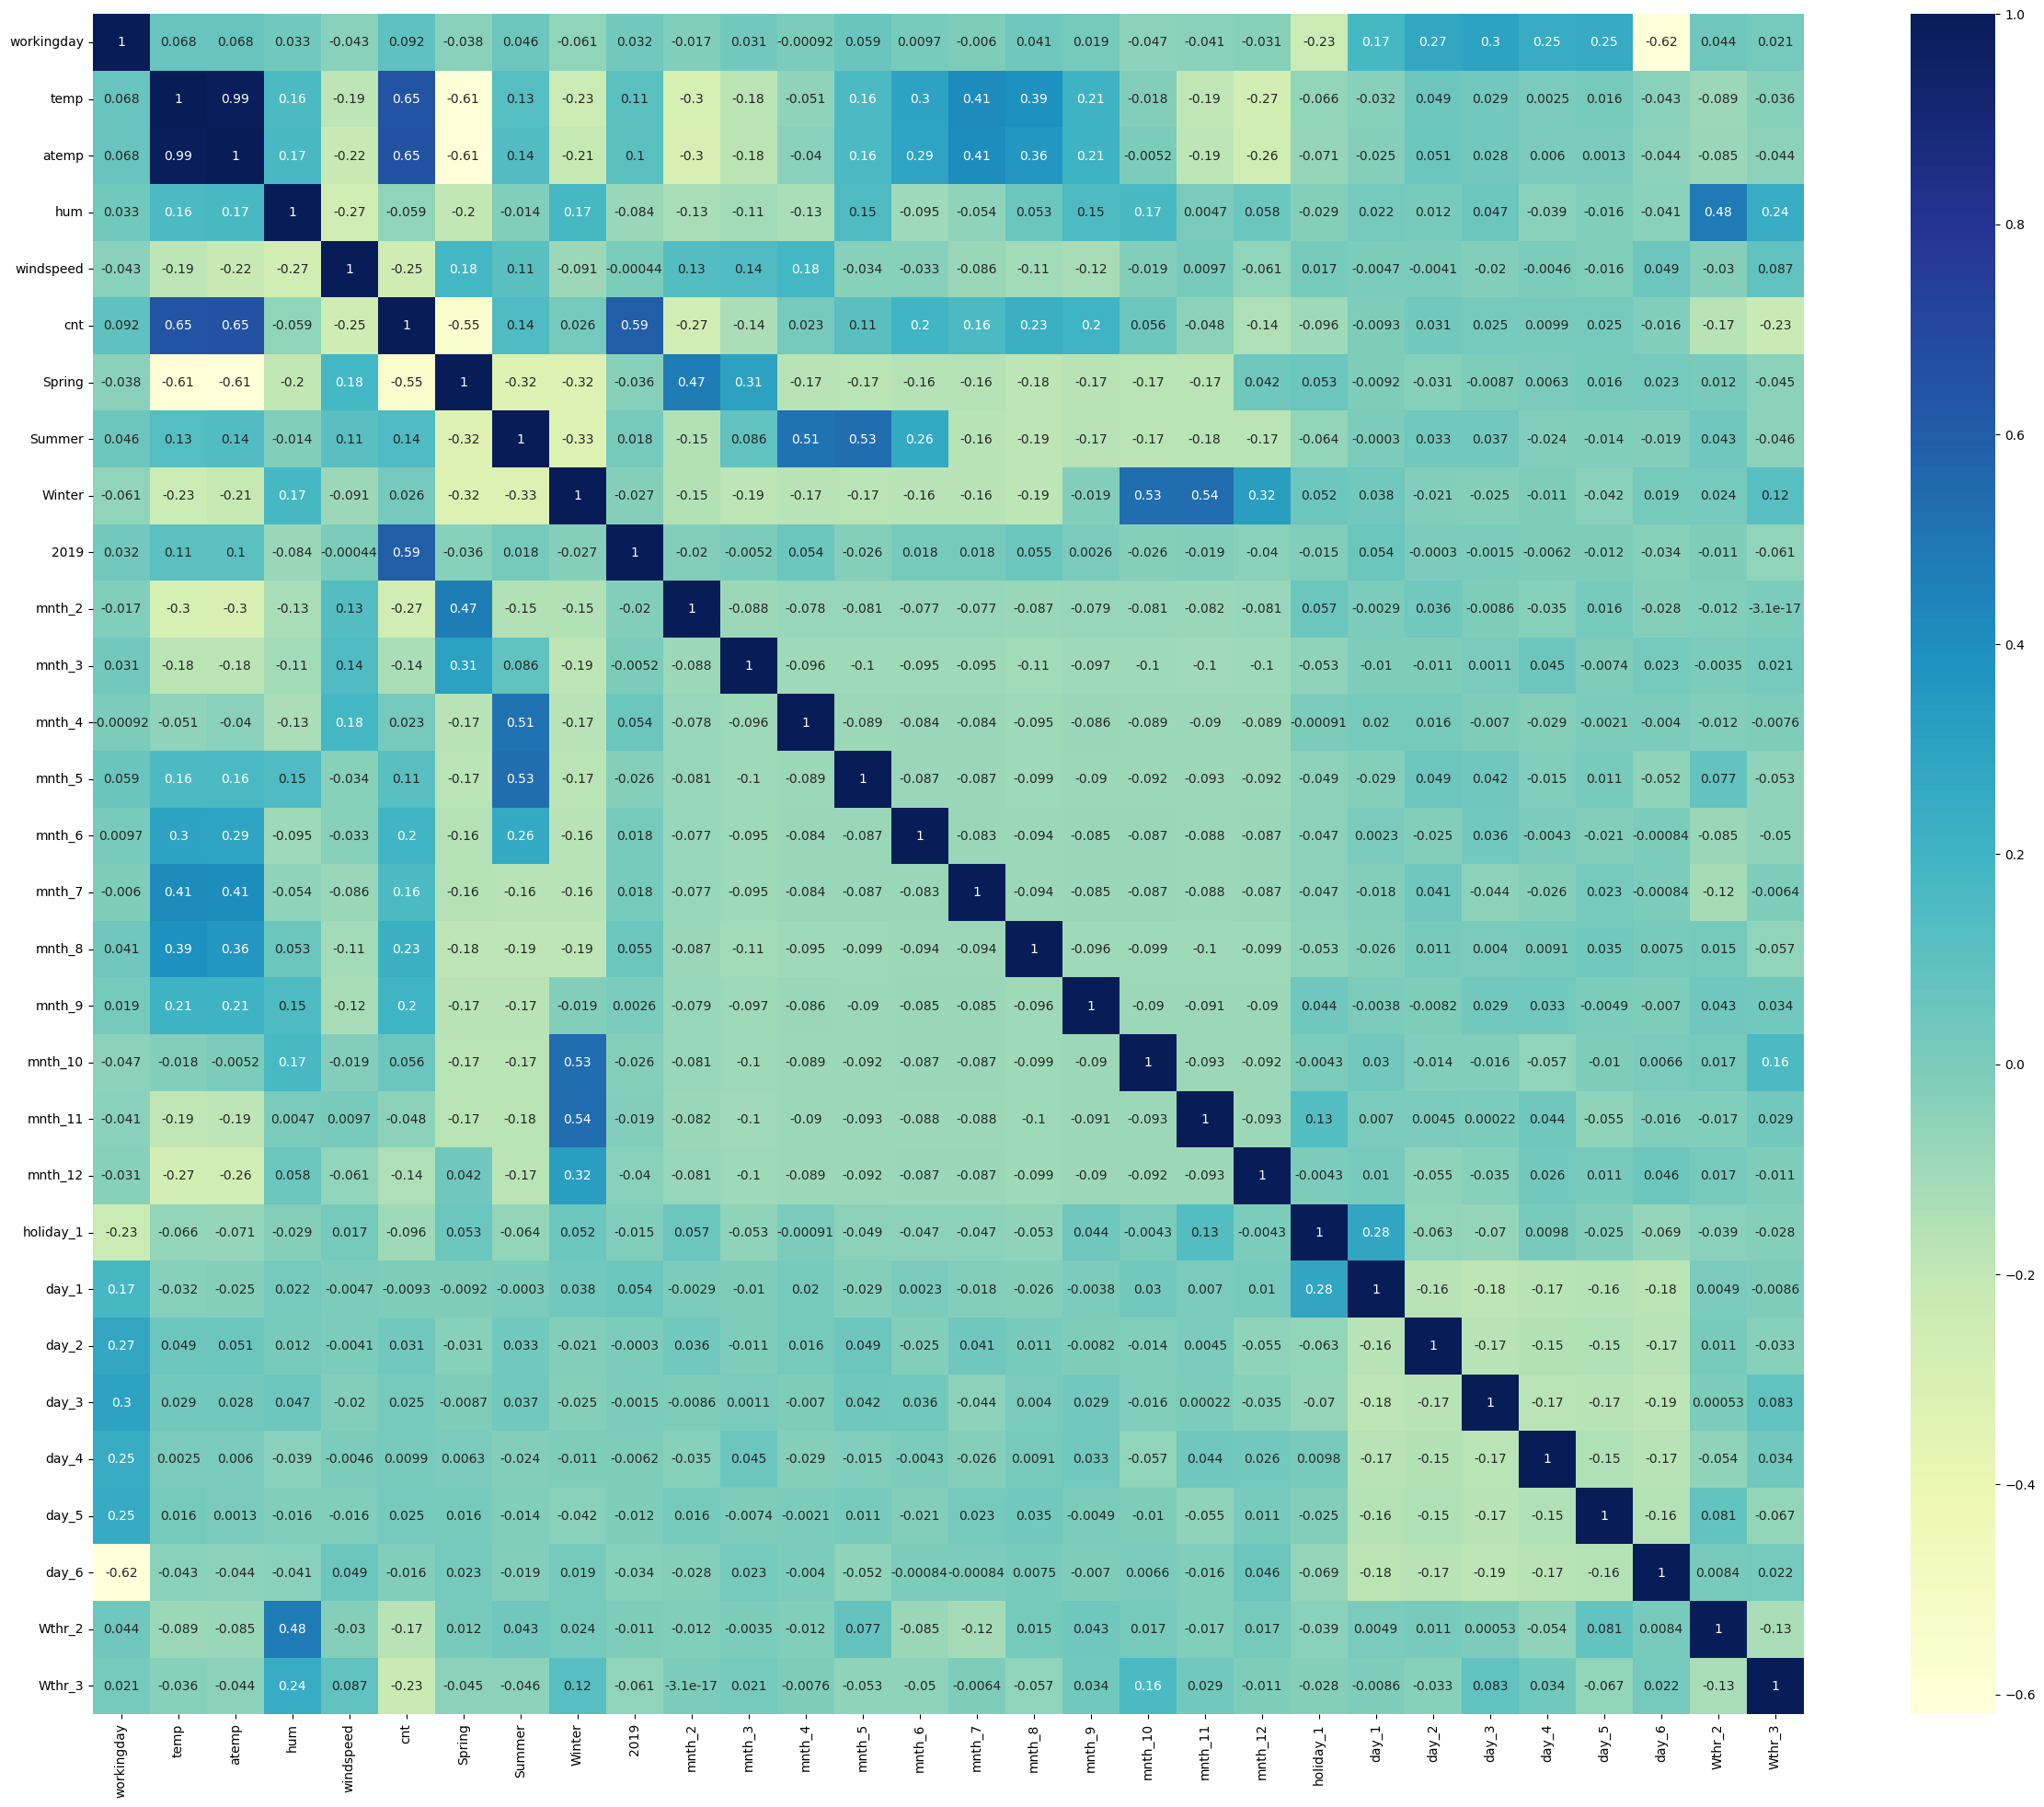

In [39]:
plt.figure(figsize=(30, 24))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
# Create X_train and y train
y_train = df_train.pop('cnt')
X_train = df_train

In [41]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [42]:
X_train.head()

,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,2019,mnth_2,...,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6,Wthr_2,Wthr_3
576,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
728,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
482,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
111,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
# Create a linear model using sklearn

lm = LinearRegression()
lm.fit(X_train,y_train)

# Create RFE

rfe =RFE(lm,n_features_to_select=17)
rfe = rfe.fit(X_train,y_train)


In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 5),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('2019', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', False, 6),
 ('mnth_4', False, 9),
 ('mnth_5', False, 7),
 ('mnth_6', False, 8),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('holiday_1', True, 1),
 ('day_1', True, 1),
 ('day_2', True, 1),
 ('day_3', True, 1),
 ('day_4', True, 1),
 ('day_5', True, 1),
 ('day_6', False, 2),
 ('Wthr_2', True, 1),
 ('Wthr_3', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]


In [46]:
# Create an LM with statsmodels to check summary statistics

X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.01e-186
Time:                        09:45:14   Log-Likelihood:                 510.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     493   BIC:                            -915.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2188      0.028      7.908      0.000       0.164       0.273
workingday     0.0250      0.008      3.227      0.001       0.010       0.040
temp           0.5384      0.022     24.430      0.000       0.495       0.582
hum           -0.1738      0.038     -4.632      0.000      -0.248      -0.100
windspeed     -0.1812      0.026     -7.056      0.000      -0.232      -0.131
Summer         0.1041      0.011      9.551      0.000       0.083       0.125
Winter         0.1483      0.011     13.898      0.000       0.127       0.169
2019           0.2287      0.008     28.116      0.000       0.213       0.245
mnth_8         0.0547      0.016      3.356      0.001       0.023       0.087
mnth_9         0.1214      0.016      7.486      0.000       0.090       0.153
holiday_1     -0.0696      0.023     -3.017      0.003      -0.115      -0.024
day_1         -0.0180      0.010     -1.861      0.063      -0.037       0.001
day_2         -0.0161      0.011     -1.449      0.148      -0.038       0.006
day_3         -0.0043      0.010     -0.417      0.677      -0.025       0.016
day_4         -0.0083      0.011     -0.770      0.442      -0.030       0.013
day_5          0.0022      0.011      0.195      0.846      -0.020       0.024
Wthr_2        -0.0545      0.011     -5.171      0.000      -0.075      -0.034
Wthr_3        -0.2363      0.026     -8.944      0.000      -0.288      -0.184
==============================================================================
Omnibus:                       53.249   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.749
Skew:                          -0.553   Prob(JB):                     3.00e-28
Kurtosis:                       5.177   Cond. No.                     1.94e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
#Check for VIF

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

C:\Users\rsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,const,47.762223
1,workingday,inf
2,temp,1.543034
3,hum,1.865447
4,windspeed,1.183447
5,Summer,1.378431
6,Winter,1.321504
7,2019,1.032273
8,mnth_8,1.441482
9,mnth_9,1.213783


In [48]:
# dropping day_4 as both VIF and P values are high
X_train_new = X_train_rfe.drop("day_4",axis =1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.01e-186
Time:                        09:45:15   Log-Likelihood:                 510.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     493   BIC:                            -915.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2188      0.028      7.908      0.000       0.164       0.273
workingday     0.0167      0.013      1.258      0.209      -0.009       0.043
temp           0.5384      0.022     24.430      0.000       0.495       0.582
hum           -0.1738      0.038     -4.632      0.000      -0.248      -0.100
windspeed     -0.1812      0.026     -7.056      0.000      -0.232      -0.131
Summer         0.1041      0.011      9.551      0.000       0.083       0.125
Winter         0.1483      0.011     13.898      0.000       0.127       0.169
2019           0.2287      0.008     28.116      0.000       0.213       0.245
mnth_8         0.0547      0.016      3.356      0.001       0.023       0.087
mnth_9         0.1214      0.016      7.486      0.000       0.090       0.153
holiday_1     -0.0779      0.029     -2.677      0.008      -0.135      -0.021
day_1         -0.0097      0.015     -0.632      0.528      -0.040       0.020
day_2         -0.0078      0.016     -0.498      0.619      -0.039       0.023
day_3          0.0040      0.015      0.266      0.790      -0.025       0.033
day_5          0.0105      0.016      0.664      0.507      -0.021       0.042
Wthr_2        -0.0545      0.011     -5.171      0.000      -0.075      -0.034
Wthr_3        -0.2363      0.026     -8.944      0.000      -0.288      -0.184
==============================================================================
Omnibus:                       53.249   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.749
Skew:                          -0.553   Prob(JB):                     3.00e-28
Kurtosis:                       5.177   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Check for VIF

vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif

,Features,VIF
0,const,47.762223
1,workingday,2.398679
2,temp,1.543034
3,hum,1.865447
4,windspeed,1.183447
5,Summer,1.378431
6,Winter,1.321504
7,2019,1.032273
8,mnth_8,1.441482
9,mnth_9,1.213783


In [50]:
# dropping day_3 as P values are high
X_train_new = X_train_new.drop("day_3",axis =1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.30e-187
Time:                        09:45:15   Log-Likelihood:                 510.72
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     494   BIC:                            -921.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2185      0.028      7.911      0.000       0.164       0.273
workingday     0.0188      0.010      1.797      0.073      -0.002       0.039
temp           0.5384      0.022     24.455      0.000       0.495       0.582
hum           -0.1735      0.037     -4.630      0.000      -0.247      -0.100
windspeed     -0.1812      0.026     -7.064      0.000      -0.232      -0.131
Summer         0.1042      0.011      9.571      0.000       0.083       0.126
Winter         0.1483      0.011     13.910      0.000       0.127       0.169
2019           0.2288      0.008     28.145      0.000       0.213       0.245
mnth_8         0.0547      0.016      3.357      0.001       0.023       0.087
mnth_9         0.1214      0.016      7.492      0.000       0.090       0.153
holiday_1     -0.0761      0.028     -2.692      0.007      -0.132      -0.021
day_1         -0.0118      0.013     -0.901      0.368      -0.038       0.014
day_2         -0.0099      0.013     -0.746      0.456      -0.036       0.016
day_5          0.0083      0.014      0.615      0.539      -0.018       0.035
Wthr_2        -0.0545      0.011     -5.173      0.000      -0.075      -0.034
Wthr_3        -0.2362      0.026     -8.949      0.000      -0.288      -0.184
==============================================================================
Omnibus:                       53.509   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.362
Skew:                          -0.556   Prob(JB):                     2.21e-28
Kurtosis:                       5.181   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Check for VIF

vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif

,Features,VIF
0,const,47.711595
1,workingday,1.502890
2,temp,1.542988
3,hum,1.863745
4,windspeed,1.183438
5,Summer,1.377349
6,Winter,1.321476
7,2019,1.032239
8,mnth_8,1.441445
9,mnth_9,1.213738


In [52]:
# dropping day_5 as P values are high
X_train_new = X_train_new.drop("day_5",axis =1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.98e-188
Time:                        09:45:15   Log-Likelihood:                 510.52
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     495   BIC:                            -927.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2189      0.028      7.932      0.000       0.165       0.273
workingday     0.0214      0.010      2.217      0.027       0.002       0.040
temp           0.5387      0.022     24.488      0.000       0.495       0.582
hum           -0.1743      0.037     -4.658      0.000      -0.248      -0.101
windspeed     -0.1812      0.026     -7.071      0.000      -0.232      -0.131
Summer         0.1039      0.011      9.562      0.000       0.083       0.125
Winter         0.1482      0.011     13.913      0.000       0.127       0.169
2019           0.2287      0.008     28.156      0.000       0.213       0.245
mnth_8         0.0547      0.016      3.358      0.001       0.023       0.087
mnth_9         0.1211      0.016      7.481      0.000       0.089       0.153
holiday_1     -0.0735      0.028     -2.632      0.009      -0.128      -0.019
day_1         -0.0143      0.012     -1.153      0.249      -0.039       0.010
day_2         -0.0125      0.013     -0.986      0.324      -0.037       0.012
Wthr_2        -0.0539      0.010     -5.143      0.000      -0.075      -0.033
Wthr_3        -0.2372      0.026     -9.011      0.000      -0.289      -0.185
==============================================================================
Omnibus:                       53.079   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.343
Skew:                          -0.551   Prob(JB):                     3.67e-28
Kurtosis:                       5.175   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Check for VIF

vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif

,Features,VIF
0,const,47.686537
1,workingday,1.271753
2,temp,1.542338
3,hum,1.861412
4,windspeed,1.183421
5,Summer,1.375891
6,Winter,1.321265
7,2019,1.031986
8,mnth_8,1.441440
9,mnth_9,1.212586


In [54]:
# dropping day_2 as P values are high
X_train_new = X_train_new.drop("day_2",axis =1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.21e-189
Time:                        09:45:15   Log-Likelihood:                 510.02
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     496   BIC:                            -932.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2200      0.028      7.977      0.000       0.166       0.274
workingday     0.0184      0.009      2.008      0.045       0.000       0.036
temp           0.5381      0.022     24.470      0.000       0.495       0.581
hum           -0.1753      0.037     -4.686      0.000      -0.249      -0.102
windspeed     -0.1818      0.026     -7.094      0.000      -0.232      -0.131
Summer         0.1038      0.011      9.552      0.000       0.082       0.125
Winter         0.1480      0.011     13.900      0.000       0.127       0.169
2019           0.2287      0.008     28.156      0.000       0.213       0.245
mnth_8         0.0549      0.016      3.373      0.001       0.023       0.087
mnth_9         0.1215      0.016      7.508      0.000       0.090       0.153
holiday_1     -0.0757      0.028     -2.722      0.007      -0.130      -0.021
day_1         -0.0114      0.012     -0.946      0.344      -0.035       0.012
Wthr_2        -0.0538      0.010     -5.128      0.000      -0.074      -0.033
Wthr_3        -0.2359      0.026     -8.972      0.000      -0.288      -0.184
==============================================================================
Omnibus:                       52.789   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.782
Skew:                          -0.543   Prob(JB):                     1.79e-28
Kurtosis:                       5.199   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Check for VIF

vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif

,Features,VIF
0,const,47.613177
1,workingday,1.144677
2,temp,1.541163
3,hum,1.860084
4,windspeed,1.182882
5,Summer,1.375698
6,Winter,1.321004
7,2019,1.031985
8,mnth_8,1.441144
9,mnth_9,1.211867


In [56]:
# dropping day_1 as P values are high
X_train_new = X_train_new.drop("day_1",axis =1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.27e-190
Time:                        09:45:15   Log-Likelihood:                 509.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     497   BIC:                            -938.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2209      0.028      8.014      0.000       0.167       0.275
workingday     0.0161      0.009      1.826      0.068      -0.001       0.033
temp           0.5387      0.022     24.509      0.000       0.496       0.582
hum           -0.1767      0.037     -4.727      0.000      -0.250      -0.103
windspeed     -0.1819      0.026     -7.100      0.000      -0.232      -0.132
Summer         0.1036      0.011      9.538      0.000       0.082       0.125
Winter         0.1478      0.011     13.881      0.000       0.127       0.169
2019           0.2282      0.008     28.154      0.000       0.212       0.244
mnth_8         0.0550      0.016      3.377      0.001       0.023       0.087
mnth_9         0.1218      0.016      7.527      0.000       0.090       0.154
holiday_1     -0.0845      0.026     -3.222      0.001      -0.136      -0.033
Wthr_2        -0.0536      0.010     -5.112      0.000      -0.074      -0.033
Wthr_3        -0.2354      0.026     -8.957      0.000      -0.287      -0.184
==============================================================================
Omnibus:                       52.293   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.304
Skew:                          -0.536   Prob(JB):                     2.27e-28
Kurtosis:                       5.201   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Check for VIF

vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif

,Features,VIF
0,const,47.559354
1,workingday,1.068274
2,temp,1.539939
3,hum,1.857293
4,windspeed,1.182836
5,Summer,1.375319
6,Winter,1.319996
7,2019,1.028114
8,mnth_8,1.441117
9,mnth_9,1.211446


In [58]:
X_train_new.head()

,const,workingday,temp,hum,windspeed,Summer,Winter,2019,mnth_8,mnth_9,holiday_1,Wthr_2,Wthr_3
576,1.0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0
426,1.0,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1,0
728,1.0,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0
482,1.0,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,1,0
111,1.0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [59]:
# Residual analysis

y_train_pred = lm.predict(X_train_new)

C:\Users\rsach\AppData\Local\Temp\ipykernel_38776\3983428140.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


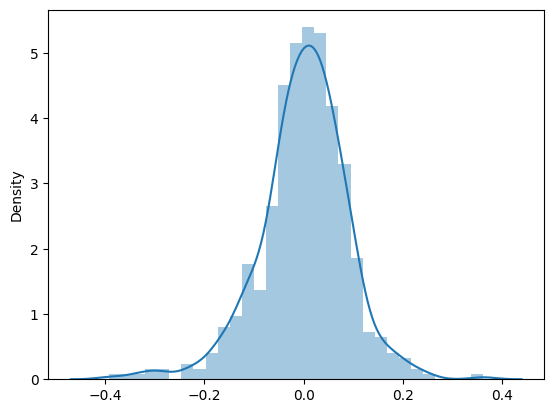

In [76]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

In [61]:
# Evaluate on test set
df_test.head()

,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,2019,...,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6,Wthr_2,Wthr_3
184,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
535,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
299,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
221,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
numvars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [63]:
# Scale the test set
df_test[numvars] = scaler.transform(df_test[numvars])
df_test.head()

,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,2019,...,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6,Wthr_2,Wthr_3
184,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
535,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
299,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
221,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
y_test = df_test.pop('cnt')


In [65]:
X_test = df_test

In [66]:
X_test.columns

Index(['workingday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', '2019', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_1', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'Wthr_2', 'Wthr_3'],
      dtype='object')

In [67]:
X_test_new = sm.add_constant(X_test)

X_test_new.head()

,const,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,2019,...,mnth_12,holiday_1,day_1,day_2,day_3,day_4,day_5,day_6,Wthr_2,Wthr_3
184,1.0,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
535,1.0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
299,1.0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
221,1.0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
col1 = X_train_new.columns
X_test_new = X_test_new[col1]

In [69]:
X_test_new.head()

,const,workingday,temp,hum,windspeed,Summer,Winter,2019,mnth_8,mnth_9,holiday_1,Wthr_2,Wthr_3
184,1.0,0,0.831783,0.657364,0.084219,0,0,0,0,0,1,1,0
535,1.0,1,0.901354,0.610133,0.153728,1,0,1,0,0,0,0,0
299,1.0,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,1,0
221,1.0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0
152,1.0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0


In [70]:
y_test_pred = lm.predict(X_test_new)

In [72]:
#Evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8051231391635728

In [73]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [74]:
y_test_pred.head()

184    0.399391
535    0.918627
299    0.398169
221    0.627903
152    0.627591
dtype: float64

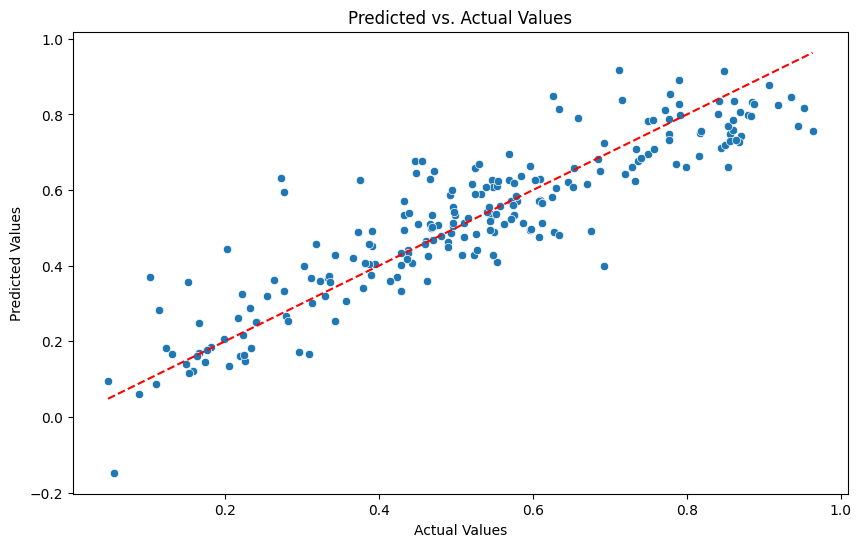

In [75]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()
